In [1]:
## deep learning
import tensorflow as tf
from tensorflow import keras

In [2]:
# check the version
tf.__version__

'2.3.0'

### Building an Image Classifier

`Fashion MNIST`: has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST.

In [3]:
# using Keras to load the dataset and split to test and train
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# check the shape
X_train_full.shape

(60000, 28, 28)

In [5]:
# create Validation set from the training set as it is not there

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# normalise
X_test = X_test / 255.0

print(X_test[1][0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05098039 0.2627451
 0.         0.         0.         0.         0.19607843 0.14901961
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [6]:
# let us see what classes we are dealing with here
class_names = ["T-shirt/top", 
               "Trouser", 
               "Pullover",
               "Dress", 
               "Coat",
               "Sandal",
               "Shirt", 
               "Sneaker", 
               "Bag",
               "Ankle boot"]

print('How it works:: {}'.format(class_names[y_train[0]]))


How it works:: Coat


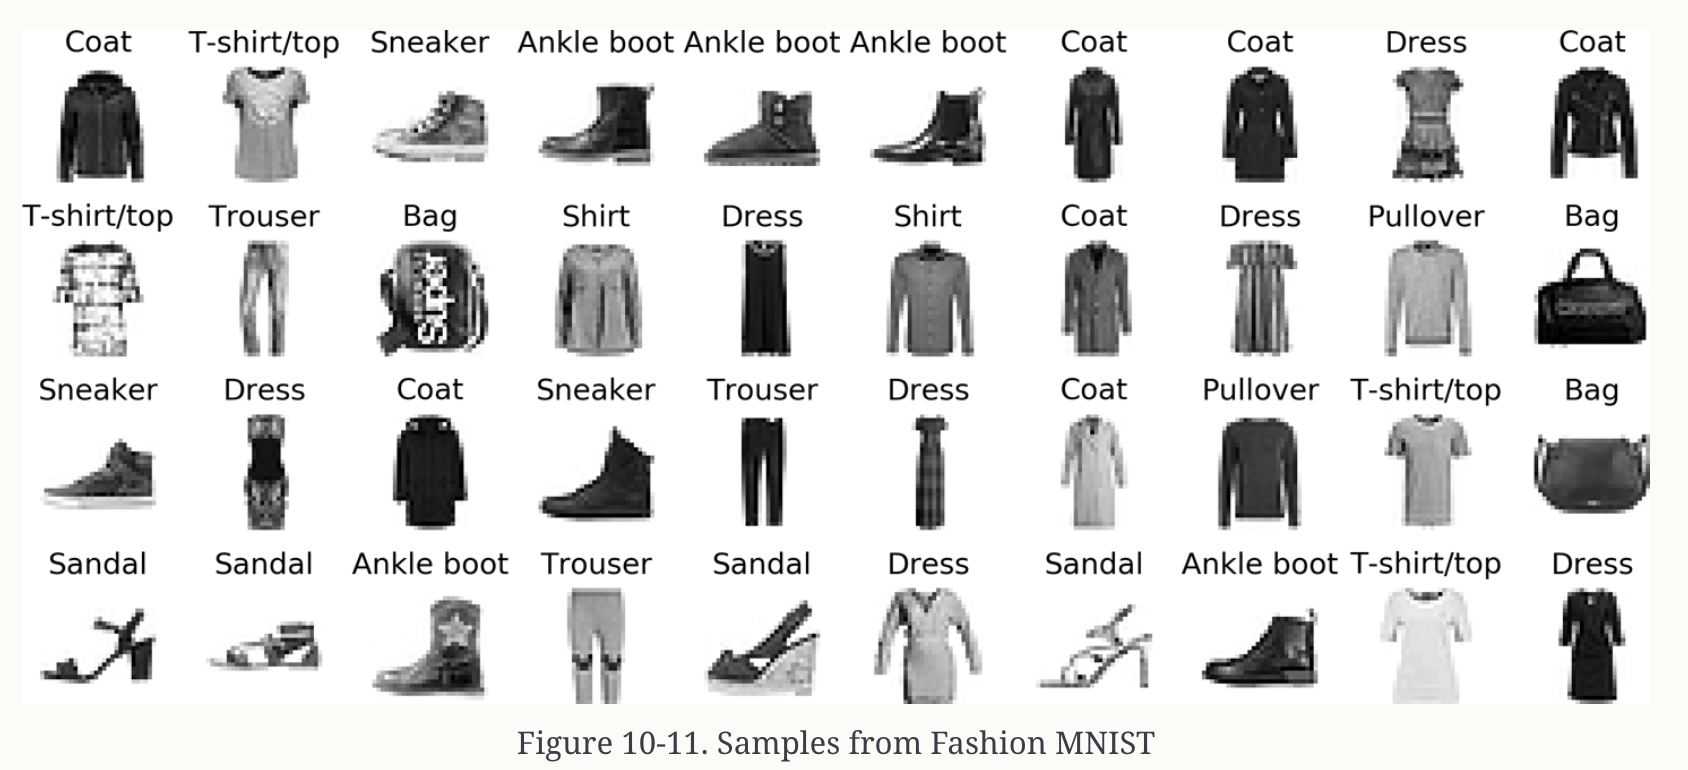

### Creating the model using the Sequential API : Classification Model

In [7]:
"""
 addding sequential layers ~ Neural Net Layer
 
 second: convert the images to 1D using reshape by specifying the input space
 
 third: Next we add a Dense hidden layer with 300 neurons. 
 It will use the ReLU activation function. 
 Each Dense layer manages its own weight matrix, 
 containing all the connection weights between the neurons and their inputs.
 It also manages a vector of bias terms (one per neuron),
 When it receives some input data
 
 We add another dense layer
 
 Final we add 10 neuron output layer for each class

""" 
## code below is old way

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))



## another way of doing the smae stuff

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
output_layer = keras.layers.Dense(10)

In [9]:
# getting the summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


**Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data**

In [10]:
# getting the layers of the models now
hidden1 = model.layers[1]

hidden1

In [11]:
# weights and biases now

weights,bias = hidden1.get_weights()

print(weights)

[[-0.0693281  -0.01269661 -0.0021173  ... -0.06249833 -0.01873135
   0.05143487]
 [-0.01573303 -0.01245251  0.05057341 ...  0.06454211 -0.02420678
   0.06921563]
 [ 0.01347758  0.01418235  0.06034069 ... -0.0477251   0.02143779
   0.00261321]
 ...
 [-0.02980736  0.05955292  0.04757459 ... -0.06734931  0.01459433
   0.05509555]
 [ 0.03366845 -0.06288071  0.04635645 ... -0.01689901 -0.06510555
  -0.00317737]
 [ 0.05357271  0.06542808 -0.02406459 ...  0.07341686 -0.06158264
  -0.06782423]]


In [12]:
# compiling the model : set the parameters

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training 

 
- We pass the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional).

- Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. 

- If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set).


In [13]:
# training the model now
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7356 - accuracy: 0.7611 - val_loss: 0.5357 - val_accuracy: 0.8138
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4923 - accuracy: 0.8274 - val_loss: 0.4566 - val_accuracy: 0.8444
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4458 - accuracy: 0.8427 - val_loss: 0.4237 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4179 - accuracy: 0.8536 - val_loss: 0.4028 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3968 - accuracy: 0.8594 - val_loss: 0.3965 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3794 - accuracy: 0.8657 - val_loss: 0.3806 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3653 - accuracy: 0.8699 - val_loss: 0.3636 - val_accuracy:

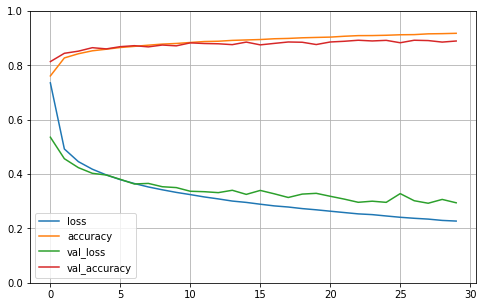

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [15]:
"""
Since the model seems to converge and then the loss seems to go down and settle
"""
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 799us/step - loss: 0.3310 - accuracy: 0.8802


[0.33096370100975037, 0.8802000284194946]

In [16]:
X_new = X_test[:3]

In [17]:
y_proba = model.predict(X_new)

In [20]:
# all probabilities for each instance for each class
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
# When only interested in the highest probability
y_pred = model.predict_classes(X_new)
print(y_pred)
# We get only one class per instance

[9 2 1]


In [24]:
# On checking we see that the predictions are correct
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a regressor using MLP/Neural Nets


In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing(as_frame=True)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)